In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.stats import norm

def generate_imbalanced_data(num_minority=15, num_majority=40):
    minority_data = np.random.uniform(-1, 0.5, num_minority)
    majority_data = np.random.uniform(-0.5, 1, num_majority)
    return minority_data, majority_data

def calculate_weights(N, k=5):
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(N.reshape(-1, 1))
    distances, indices = nn.kneighbors(N.reshape(-1, 1))

    weights = np.zeros(len(N))
    for i in range(len(N)):
        # Count how many of the k-nearest neighbors are from the majority class
        weights[i] = sum(1 for idx in indices[i] if N[idx] in N) / k
    return weights

def calculate_sample_size(P, N, alpha, sigma, epsilon, M=1.5):
    num_P = len(P)
    num_N = len(N)
    Za_2 = norm.ppf(1 - alpha / 2)
    n1 = num_P ** 2 / num_N
    n2 = num_N * (Za_2 ** 2) * (sigma ** 2) / (num_N * (epsilon ** 2) + (Za_2 ** 2) * (sigma ** 2))
    Pr = n2 / n1
    if 1 <= Pr <= M:
        return int(n2)
    elif Pr > M:
        return int(M * n1)
    else:
        return int(n1)

def select_set_n(N, weights, sample_size):
    max_p = max(P)
    valid_indices = [i for i in range(len(N)) if N[i] > max_p ]
    valid_weights = [weights[i] for i in valid_indices]
    probabilities = np.array(valid_weights) / sum(valid_weights)
    indices = np.random.choice(valid_indices, size=sample_size, replace=False, p=probabilities)
    return N[indices]

def cartesian_product(P, N, SetN):
    P_cartesian = np.array([[p1, p2] for p1 in P for p2 in P])
    N_cartesian = np.array([[n, abs(sn)] for n in N for sn in SetN])
    return P_cartesian, N_cartesian

def plot_data(P_cartesian, N_cartesian):
    plt.figure(figsize=(10, 6))
    plt.scatter(P_cartesian[:, 0], P_cartesian[:, 1], color='red', label='Minority Class (P x P)')
    plt.scatter(N_cartesian[:, 0], N_cartesian[:, 1], color='blue', label='Majority Class (N x SetN)')
    plt.title('Concatenated Sample Space')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()


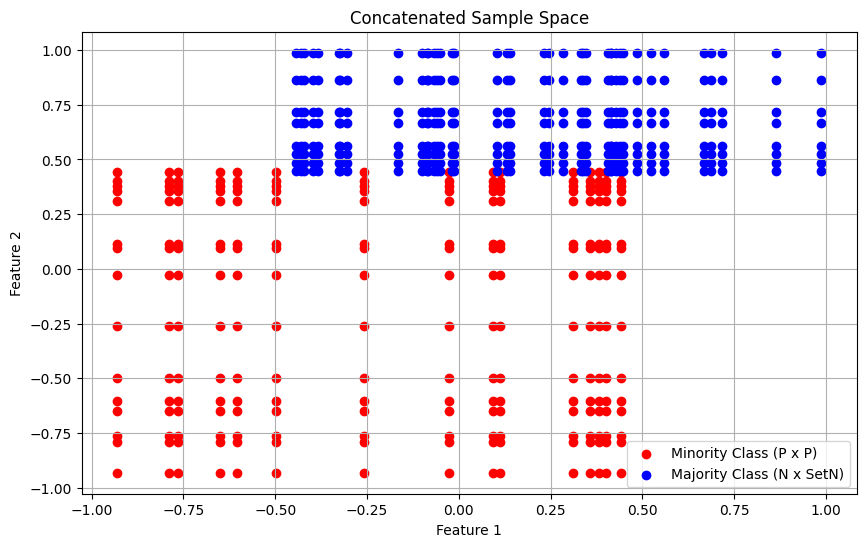

In [ ]:
# Generate data
P, N = generate_imbalanced_data()

# Calculate weights for the majority class
weights = calculate_weights(N)

# Determine the size of SetN
sample_size = calculate_sample_size(P, N, alpha=0.05, sigma=0.1, epsilon=0.05)

# Select SetN from the majority class
SetN = select_set_n(N, weights, sample_size)

# Perform Cartesian product concatenation
P_cartesian, N_cartesian = cartesian_product(P, N, SetN)

# Plot the results
plot_data(P_cartesian, N_cartesian)


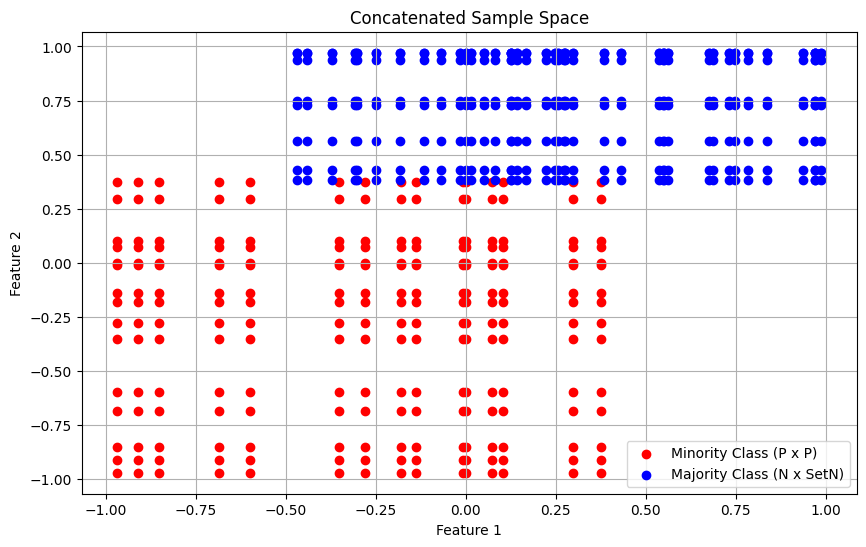

Original Class Complexity for Minority (P): 0.2933333333333334
Original Class Complexity for Majority (N): 0.7449999999999999
Class Complexity for Minority (P) after GA: 0.2933333333333334
Class Complexity for Majority (N) after GA: 0.25


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.stats import norm

def generate_imbalanced_data(num_minority=15, num_majority=40):
    minority_data = np.random.uniform(-1, 0.5, num_minority)
    majority_data = np.random.uniform(-0.5, 1, num_majority)
    return minority_data, majority_data

def calculate_weights(N, k=5):
    N = N.reshape(-1, 1)  # Reshape for NearestNeighbors
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(N)
    distances, indices = nn.kneighbors(N)

    weights = np.zeros(len(N))
    for i in range(len(N)):
        weights[i] = sum(1 for idx in indices[i] if N[idx] in N) / k
    return weights

def calculate_sample_size(P, N, alpha, sigma, epsilon, M=1.5):
    num_P = len(P)
    num_N = len(N)
    Za_2 = norm.ppf(1 - alpha / 2)
    n1 = num_P ** 2 / num_N
    n2 = num_N * (Za_2 ** 2) * (sigma ** 2) / (num_N * (epsilon ** 2) + (Za_2 ** 2) * (sigma ** 2))
    Pr = n2 / n1
    if 1 <= Pr <= M:
        return int(n2)
    elif Pr > M:
        return int(M * n1)
    else:
        return int(n1)

def select_set_n(P, N, weights, sample_size):
    max_p = max(P)
    valid_indices = [i for i in range(len(N)) if N[i] > max_p]
    valid_weights = [weights[i] for i in valid_indices]
    probabilities = np.array(valid_weights) / sum(valid_weights)
    indices = np.random.choice(valid_indices, size=sample_size, replace=False, p=probabilities)
    return N[indices]

def cartesian_product(P, N, SetN):
    P_cartesian = np.array([[p1, p2] for p1 in P for p2 in P])
    N_cartesian = np.array([[n, abs(sn)] for n in N for sn in SetN])
    return P_cartesian, N_cartesian

def plot_data(P_cartesian, N_cartesian):
    plt.figure(figsize=(10, 6))
    plt.scatter(P_cartesian[:, 0], P_cartesian[:, 1], color='red', label='Minority Class (P x P)')
    plt.scatter(N_cartesian[:, 0], N_cartesian[:, 1], color='blue', label='Majority Class (N x SetN)')
    plt.title('Concatenated Sample Space')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

def calculate_class_complexity(X, k=5, threshold=0.1):
    X = X.reshape(-1, 1)  # Reshape for NearestNeighbors
    nn = NearestNeighbors(n_neighbors=k + 1)
    nn.fit(X)
    distances, indices = nn.kneighbors(X)
    complexities = []
    for i in range(len(X)):
        same_class_neighbors = sum(1 for idx in indices[i][1:] if np.abs(X[idx] - X[i]) < threshold)
        complexities.append(same_class_neighbors / k)
    return np.mean(complexities)

# Generate data
P, N = generate_imbalanced_data()

# Calculate weights for the majority class
weights = calculate_weights(N)

# Determine the size of SetN
sample_size = calculate_sample_size(P, N, alpha=0.05, sigma=0.1, epsilon=0.0001)

# Select SetN from the majority class
SetN = select_set_n(P, N, weights, sample_size)

# Perform Cartesian product concatenation
P_cartesian, N_cartesian = cartesian_product(P, N, SetN)

# Plot the results
plot_data(P_cartesian, N_cartesian)

# Calculate complexities
original_complexity_P = calculate_class_complexity(P)
original_complexity_N = calculate_class_complexity(N)
complexity_P_after_GA = calculate_class_complexity(P)
complexity_N_after_GA = calculate_class_complexity(SetN)

print("Original Class Complexity for Minority (P):", original_complexity_P)
print("Original Class Complexity for Majority (N):", original_complexity_N)
print("Class Complexity for Minority (P) after GA:", complexity_P_after_GA)
print("Class Complexity for Majority (N) after GA:", complexity_N_after_GA)
